### `1` Briefly describe the disadvantages of Flattening (as first layer or after Input) and how do you overcome those issues ?


Flattening is the process of converting a multi-dimensional array into a one-dimensional array. In a neural network, flattening is typically used to convert the output of a convolutional layer into a format that can be input to a fully connected (dense) layer.

One of the main disadvantages of flattening is that it loses spatial information about the input data. This can be a problem if the spatial arrangement of the input data is important for the task at hand. For example, in an image classification task, the relative positions of the pixels in the image are important for identifying the objects in the image. Flattening the image into a one-dimensional array would destroy this spatial information, making it more difficult for the model to learn.

Another disadvantage of flattening is that it can increase the number of parameters in the model. This can make the model more prone to overfitting, and it can also make the model more computationally expensive to train.

To overcome these issues, one approach is to use spatial pyramid pooling layers instead of flattening. These layers divide the input data into a grid of spatial regions and then apply pooling operations to each region. This allows the model to retain some of the spatial information from the input data, while also reducing the number of parameters in the model. Other approaches include using recurrent layers or attention mechanisms, which can also help the model to learn spatial relationships in the input data.


### `2` Stanford Vision department, has collected and annotated images of 120 breeds of dogs from ImageNet. Dataset can be found here.
* Prepare an EDA sheet & explain what you understand from this data. What would be your approach? 
* With a limited number of training images per class, what extra steps will you incorporate for a good model? 
* Iterate over and try different architecture and topologies and preserve the results of each experiment using TensorBoard. Also, save major metrics in an Excel (or try W&B). 


### EDA

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
print('Total No. of breeds in the dataset :',labels.breed.unique().shape[0])

Total No. of breeds in the dataset : 120


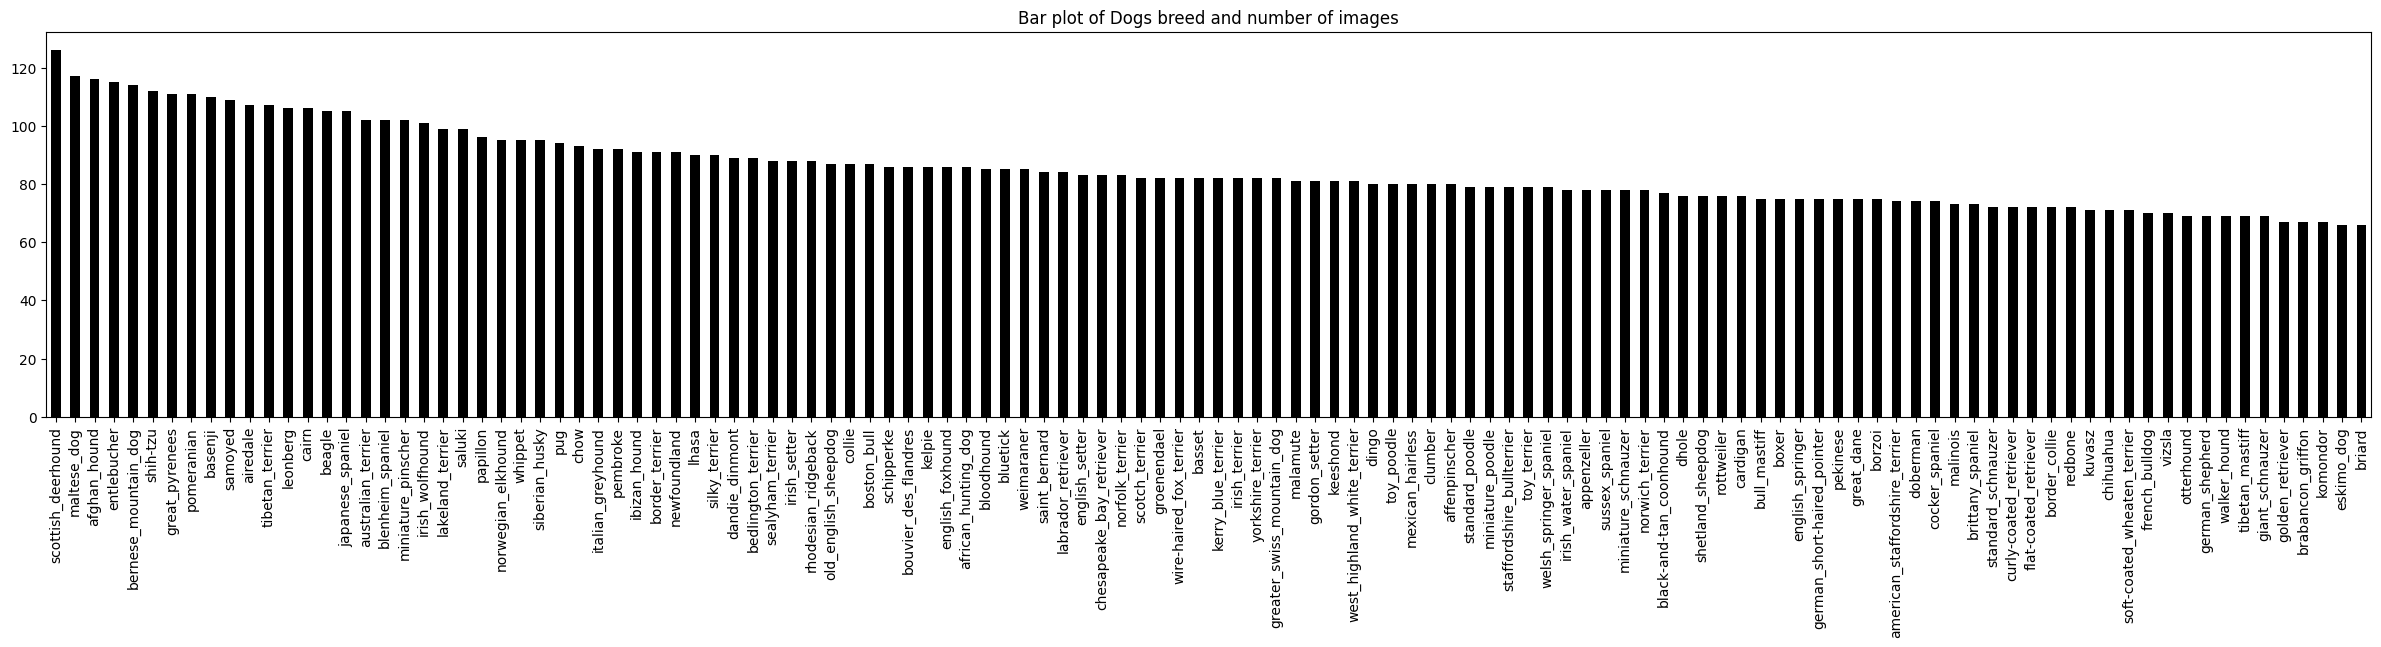

In [7]:
labels.breed.value_counts()[:120].plot(kind='bar',figsize=(30,5),title = 'Bar plot of Dogs breed and number of images',color='black')
plt.show()

In [8]:
value_counts_name = labels.breed.value_counts().index
value_counts = labels.breed.value_counts()
print("The breed with the highest no. of photos is :",value_counts_name[0],
      "\nNo.of Images : ",value_counts[0],
      "\nThe breed with the lowest no. of photos is :",value_counts_name[-1],
      "\nNo.of Images :",value_counts[-1])

The breed with the highest no. of photos is : scottish_deerhound 
No.of Images :  126 
The breed with the lowest no. of photos is : briard 
No.of Images : 66


In [9]:
print(f"Images per breed : {labels.shape[0]/labels.breed.unique().shape[0]}")

Images per breed : 85.18333333333334


In [10]:
labels.isnull().sum().sum()

0

There are 10k plus photos of Dogs that are classified in 120 breeds, this comes down to an average of 85 images of dogs per breed with which we should first try and fit a model, but before that we need to split the training data in train and split and check how the model is performing. Identifying dog breeds can be difficult because some breeds may have very little distinguishable features for which more data might be required for the model to learn from.

We can take actions as following:

* Data Augmentation
* Transfer Learning

### `3` Achieve the above problem on Kaggle itself and submit your results.

Link to the Dog Breed Classifier Kernel Solved on Kaggle
https://www.kaggle.com/code/anupo2o1/dogbreed-classifier/notebook

In [8]:
def plot(hist):
    fig = plt.subplots(1,2,figsize = (10,5))
    plt.subplot(1,2,1)
    plt.plot(hist["loss"])
    plt.plot(hist['val_loss'])
    plt.legend(['Training','Validation'])
    plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(hist["accuracy"])
    plt.plot(hist['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.title('Accuracy')

# CNN Model History Plot

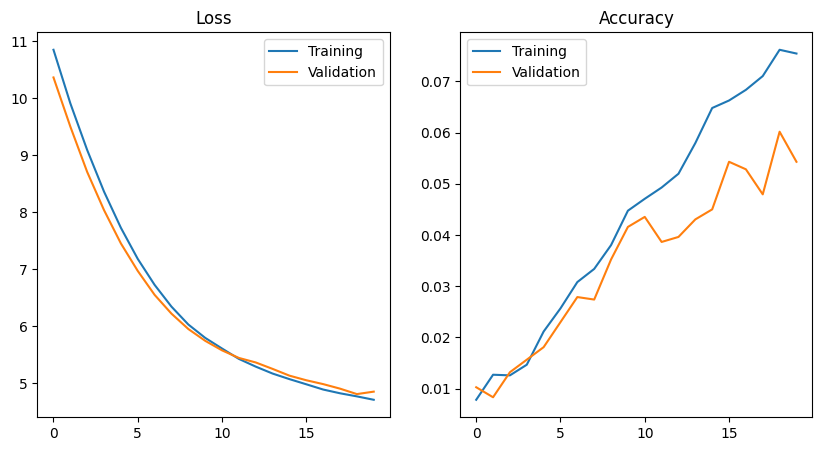

In [9]:
cnn_hist = pd.read_csv('results/CNN_log.csv')
plot(cnn_hist)

# VGG16 Model History Plot

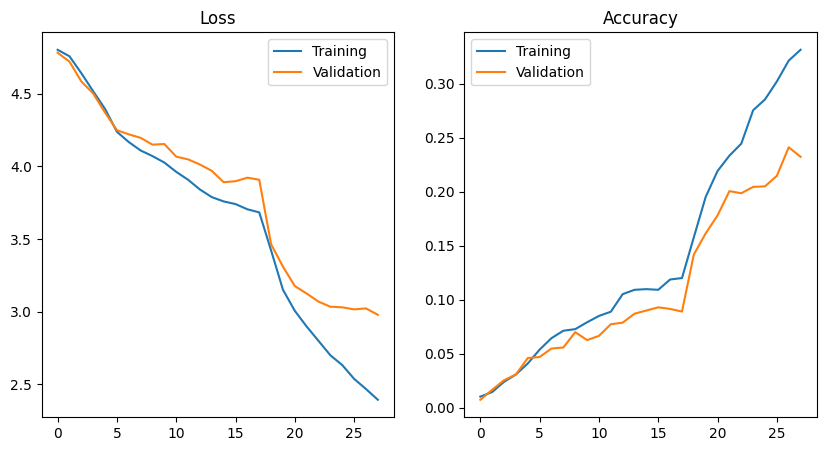

In [11]:
vgg_hist = pd.read_csv('results/vgg_log.csv')
plot(vgg_hist)

# Inception_V3 Model History Plot

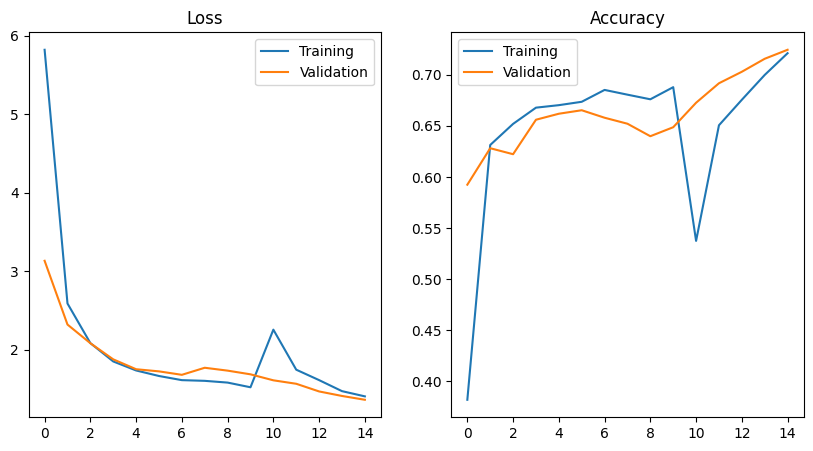

In [12]:
incep_hist = pd.read_csv('results/incep_log.csv')
plot(incep_hist)

# Xception Model History Plot

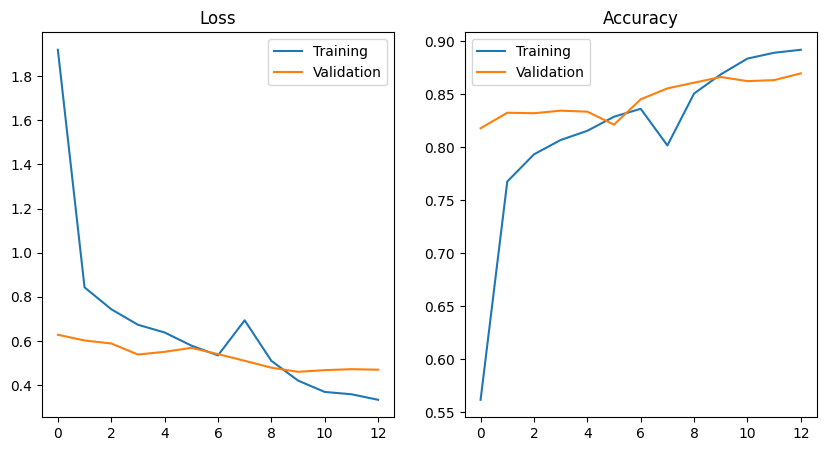

In [13]:
xcep_hist = pd.read_csv('results/xcep_log.csv')
plot(xcep_hist)

### `4` What are Convolutional Neural Networks and how are they better than regular only Fully Connected Neural Networks?

Convulational Neural Networks (CNN) is a type of Neural network that can deal with the image classsification problems, speech and audio signal recognisation problems, CNN are high level neural network that can enable matrix multiplication in a neural network enabling the machine to recognize pattern and fetures from images or signal data. A CNN has different layers within it for feature extraction from matrices, These layers are as follows :

* Convolutional layer
* Pooling layer
* Fully Connected layer

**`Convolutional layer`**

This layer is the major component of the CNN, this is where the major feature extraction occurs, this layers requires a few components namely input data, filter and a feature map.
If the input is a color image it will have three dimension of height and width of image, each dimension in the htree dimension represent the colors Red, Green, Blue. A filter also refered to as a kernel or feature detector will move around the respective field and detect if a feature is present or not at that point in the matrix, 
<center>
<img src=' https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png' height=300/>
</center>
As seen in the above image the kernel is not connected to each and very endpoint of the matrix, due to this nature of this layer and pooling layer they are also known as partially connected layer. The feature extraction is the dot product of the input matrix and 2D(kernel) thet sweeps across the matrix until it reaches the end of matrix and the end result of each dot product is stored in a new matrix known as feature map.

After each convolution operation, a CNN applies a Rectified Linear Unit (ReLU) transformation to the feature map, introducing nonlinearity to the model.

**`Pooling layer`**

Pooling layer is reponsible for the dimensionality reduction of the feature map that is to be sent to the next layer, similar to the convolution layer a filter is sweept across the feature map but instead of performing a dot product it performs a aggregate function and send s the output the output layer.

There are two types of pooling method:

*`Average Pooling`*

In this method the filter is swept across the feature map and the average of the values in the respective fields are passed on to the output layer

*`Max Pooling`*

In this method the filter is swept across the feature map and the maximum of the values in the respective fields are passed on to the output layer

**`Fully Connected Neural Network`**

This is the final layer of the CNN where the input is the flattened array from the pooling layer which then performs the task of classification based on the feature extracted from the previous layer.

If we don't use the convulation layer and directly send the images to the fully connected NN it wont be able to generalize for the objects and will fail in image classification as the FNN is unable to extract features from the images.




### `5` The major components of a CNN topology are Filter/ Kernel, Strides, etc. Explain mathematically the output of a single CNN layer and how it is impacted by strides?


In [2]:
import numpy as np

CNN works on matrices so lets define a Image that is to be fed to the CNN layer, we take a randomly initialised matrix of 32,32 in this case, and a filter/kernel of shape 3,3 which will be windowed over the Image.

In [101]:
IMAGE = np.random.randint(244,size=(32,32))
kernel = np.random.randint(5,size=(3,3))

print(IMAGE,'\n Shape of the Image',IMAGE.shape)
print(kernel,'\n Shape of the kernel',kernel.shape)


[[ 89  68 210 ... 155  62 117]
 [ 59  81  75 ...  46   2 232]
 [ 61 137  81 ...  74  44 188]
 ...
 [148 171  48 ... 240 162 133]
 [ 96 171 151 ... 194 102  22]
 [ 46 126 156 ... 198 100 118]] 
 Shape of the Image (32, 32)
[[2 3 4]
 [3 2 0]
 [2 0 0]] 
 Shape of the kernel (3, 3)


If we have a input matrix/image of shape (N X N) and a kernel of (m X m) then the resulting feature map wuld be of shape (N - m + 1) X (N -m + 1)
for our example the shape oof our feature map would be as follows.

In [106]:
N = IMAGE.shape[0]
m = kernel.shape[0]
feature_shape = (N-m+1)
print('Shape of feature map is : ',feature_shape,feature_shape)

Shape of feature map is :  30 30


The Kernel is initialized with some random weights and is multiplied with the respective field of the image , the whole output is sum and stored in the feature map, this whole process is repeated until the whole image is swept by the kernel, the kernel takes steps of (1,1) in the below example.

In [110]:
stride = (1,1)
feature_map = []
for i in range(0,N,stride[0]):
    for j in range(0,N,stride[1]):
        f =np.multiply(IMAGE[i:i+m,j:j+m],kernel)
        feature_map.append(f.sum())
        if j+m == N:
            break
    if i+m == N:
        break

feature_map = np.array(feature_map).reshape(feature_shape,feature_shape)
print(feature_map.shape)
print(feature_map)


(30, 30)
[[1683 1849 2393 3002 2099 2066 2165 2384 2257 2013 2569 2054 2237 2779
  1835 1765 1884 2014 2179 2835 2210 2494 2073 2444 1927 1632 1497 2059
  1665 1254]
 [1428 2076 1994 1829 1104 1365 1918 1925 2224 1924 2245 2016 1982 2315
  2001 1263 1350 1525 2080 2666 2625 2269 2605 2126 1787 1613 1256 1322
   786 1484]
 [1694 1623 1126 1328 1224 2422 2050 2133 2224 2678 2097 1933 1887 2178
  1877  851 1178 1769 2463 2717 1949 2074 2294 1713 2135 2033 1039 1235
   858 2144]
 [1682 1767 1487 2098 2579 2588 2676 2480 2133 1873 1218 1186 1601 1961
  1898 1900 2392 2534 3132 2392 1758 1920 2160 1961 2092 1453 1339  988
  2038 2385]
 [2417 2578 2283 2350 2218 2078 2418 2325 2033 1922 1558 1885 1837 2014
  2206 2592 2533 2509 2597 1630 1630 2219 2134 1990 2005 1510 1066 1480
  2246 1963]
 [1762 1516 1923 1406 1564 1887 1892 2657 2928 2846 2228 1830 1379 2503
  2733 2586 1915 2544 2126 1976 1893 1770 1953 1486 2654 1647 1436 1280
  2416 1289]
 [2121 2079 2477 1424 2092 2013 2063 2235 2222 25

Taking the features into consideration the output dimension of the convolved matrix changes based on the formula as below:

Output_shape =( (N - k + 2 * P) / Stride) + 1

Stride is the steps that the kernel take while sweeping the Image matrix and can be used to remove the overlapping features that are getting captured.


In [156]:
IMAGE = np.random.randint(244,size=(7,7))
kernel = np.random.randint(5,size=(3,3))

print(IMAGE,'\n Shape of the Image',IMAGE.shape)
print(kernel,'\n Shape of the kernel',kernel.shape)


def Conv(IMAGE,kernel,Stride,padding = 0):
    N = IMAGE.shape[0]
    m = kernel.shape[0]

    feature_shape = int((N - m + 2 * padding)/Stride[0]) + 1
    print(feature_shape)
    feature_map = []
    for i in range(0,N,Stride[0]):
        for j in range(0,N,Stride[1]):
            f =np.multiply(IMAGE[i:i+m,j:j+m],kernel)
            feature_map.append(f.sum())
            if j+m == N:
                break
        if i+m == N:
            break

    feature_map = np.array(feature_map).reshape(feature_shape,feature_shape)
    return feature_map

[[218 162  68 224 202 142 232]
 [103  99 206 243  82  87 215]
 [177 176 120 188 176 167  15]
 [145 103  47 126   0 166 132]
 [197 216 166  82  20 198  88]
 [ 49   2 133  75  91  66  17]
 [ 31 122 131  42   8  26 147]] 
 Shape of the Image (7, 7)
[[3 3 4]
 [1 0 0]
 [4 2 2]] 
 Shape of the kernel (3, 3)


In [157]:
features = Conv(IMAGE,kernel,Stride=(2,2))
features.shape

3


(3, 3)

In [158]:
features = Conv(IMAGE,kernel,Stride=(1,1))
features.shape

5


(5, 5)

In [160]:
features = Conv(IMAGE,kernel,Stride=(4,4))
features.shape

2


(2, 2)

In [161]:
features = Conv(IMAGE,kernel,Stride=(7,7))
features.shape

1


(1, 1)

We can see from aboe different examples that increasing the size of the stride decreases the output of the convolutional layer

### `6` For a single channel image, size (9x9) and a filter of size (2x2) and stride (2x2), calculate the output. Is padding required ? What is the output size of this convoluted feature?


In [166]:
N = 9
m = 2
s = 2

O = (N - m)/s + 1
O

4.5

The Output from the covolution of a single Image size of 9 X 9 with filter size of 2 X 2 is not possible as the output shape will be (4.5,4.5) matrix which is not possible, hence here we can apply a padding of size 1 of zeros around all the corner of the matrix and make it of size (10 x 10) and after the convolution we will get a output of size as calculated below. 

In [168]:
N = 10
P = 1
m = 2
s = 2

(N - m + 2 * P) / s + 1

6.0

 ### `7` For a particular problem if the error is not dipping below a standard point, what are the techniques used to reduce error ? Explain the methodology in depth and with examples.


There might be cases when the loss get stucks at a point and stopps dipping in this case we can do the following. This can be solved by two approach.

`Dataset`

Maybe the data available for the model is not sufficient so the model is not avaialble to train. So we need to gather more data for the problem, we can use data Augmentation technique

Get More Data.
Invent More Data.
Rescale Your Data.
Transform Your Data.
Feature Selection.


`Algorithm`

Here are some ideas on tuning your neural network algorithms in order to get more out of them.

Diagnostics.
Weight Initialization.
Learning Rate.
Activation Functions.
Network Topology.
Batches and Epochs.
Regularization.
Optimization and Loss.
Early Stopping.

If the error is not reducing below a certain point, it may be due to a variety of factors. Here are some techniques that can be used to reduce the error:

`Regularization`: Regularization is a technique used to prevent overfitting, which can cause high error on unseen data. This is done by adding a penalty term to the objective function that encourages the model to have smaller weights. This reduces the complexity of the model and helps it generalize better to unseen data.
For example, in linear regression, regularization can be applied by adding a penalty term to the objective function that is proportional to the sum of the squares of the model weights. This is known as L2 regularization.

`Early stopping`: Another technique to prevent overfitting is early stopping, which involves monitoring the performance of the model on a validation set and stopping the training process when the error on the validation set starts to increase. This helps prevent the model from overfitting to the training data.
For example, in a neural network, the training process can be stopped when the error on the validation set starts to increase. This can be implemented by using a callback function in popular deep learning frameworks such as TensorFlow or PyTorch.

`Feature engineering`: Another way to reduce error is to carefully select or design the features used by the model. This can help the model learn more relevant and predictive patterns in the data, which can in turn reduce the error.
For example, in a supervised learning task, it may be helpful to perform feature selection to identify the most relevant features for the model. This can be done using techniques such as correlation analysis or feature importance scores from a model.

`Model selection`: Choosing the right model for the task at hand is also important for reducing error. Different models have different strengths and weaknesses, and some may be better suited to certain types of data or tasks than others. Careful model selection can help ensure that the model is well-suited to the task and can reduce error.
For example, in a classification task, it may be helpful to compare the performance of different models such as logistic regression, support vector machines, and decision trees on the data. The model with the lowest error on a validation set can then be selected for use on the test set.


We can also try to improve the performance of our model by tuning its hyperparameters. Hyperparameters are the settings that control the behavior of the algorithm, and they can have a big impact on the model's performance. For example, if we are using a neural network, we can try different values for the learning rate, the number of hidden layers, or the regularization strength. By carefully tuning these hyperparameters, we can often improve the performance of our model.
